In [2]:
SEGMENT_SIZE=2**18
IN='./baby-elephant-walk.wav'
OUT_TEMP='temp.data'
OUT_COMPRESSED='baby-elephant-walk-0.25.jamm'
TERM_REMOVAL_QUARTILE=0.25

In [3]:
import scipy.io.wavfile
import scipy.fft
import matplotlib.pyplot as plt
import numpy as np

rate, samples = scipy.io.wavfile.read(IN);
samples = samples if SEGMENT_SIZE == 0 else samples[0:SEGMENT_SIZE]

transformed = scipy.fft.fft(samples)
freq = scipy.fft.fftfreq(len(samples))

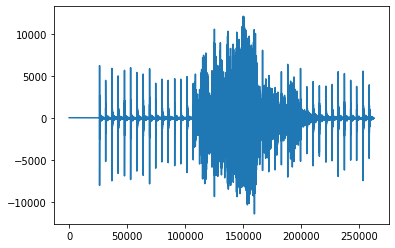

In [4]:
plt.plot(samples)

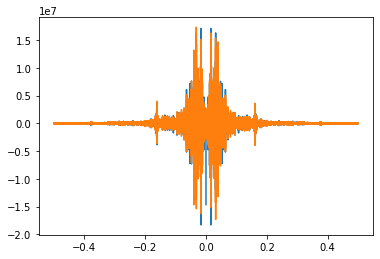

In [5]:
plt.plot(freq, transformed.real, freq, transformed.imag)

Before 0 count 0
After 0 count 65535
Total frquency count 262144


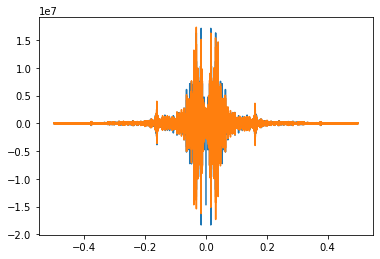

In [6]:
import math

def size(magnitude):
    return math.sqrt(magnitude.real**2 + magnitude.imag**2);

min_magnitude = np.quantile(
    np.array([size(magnitude) for magnitude in transformed]),
    TERM_REMOVAL_QUARTILE
)

filtered = [
    (magnitude if (size(magnitude) >= min_magnitude) else 0) for magnitude in transformed
]

print('Before 0 count', sum([1 if size(magnitude) == 0 else 0 for magnitude in transformed]))
print('After 0 count', sum([1 if size(magnitude) == 0 else 0 for magnitude in filtered]))
print('Total frquency count', len(filtered))

plt.plot(freq, [item.real for item in filtered], freq, [item.imag for item in filtered])

In [7]:
import pickle
import zipfile

out = [rate]
zeros_sequential_count = 0

for magnitude in filtered:
    if (size(magnitude) == 0):
        zeros_sequential_count += 1
    else:
        if zeros_sequential_count > 0:
            out.append(zeros_sequential_count)
            zeros_sequential_count = 0
        out.append([
            magnitude.real,
            magnitude.imag
        ])

pickle.dump(out, open(OUT_TEMP, 'wb'))
with zipfile.ZipFile(OUT_COMPRESSED, 'w', compression=zipfile.ZIP_DEFLATED, compresslevel=9) as zip:
    zip.write(OUT_TEMP)